In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part A

In [2]:
G = nx.read_edgelist('./MidTerm_Data/ELfriend_edgelist.txt',comments="node",create_using=nx.DiGraph(),nodetype=int)
nodes_with_attributes = pd.read_table("./MidTerm_Data/ElnodeAttributes.txt", sep='\t')
nodes_with_attributesData = nodes_with_attributes.set_index('Node').to_dict('index').items()
G.add_nodes_from(nodes_with_attributesData)

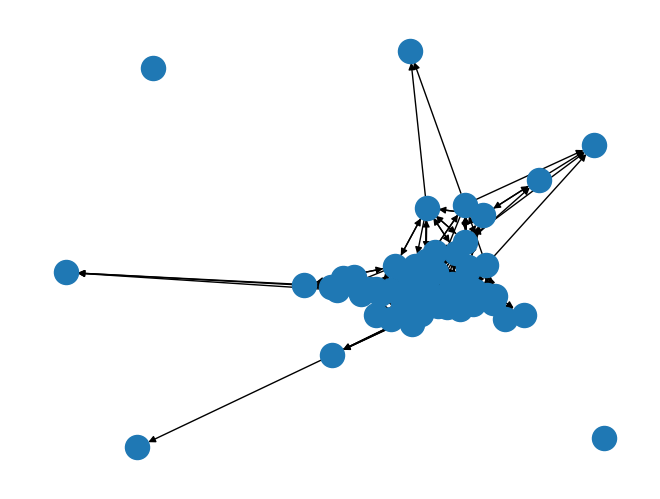

In [3]:
nx.draw(G)

## 1.

In [4]:
print(f"There are {len(G.nodes())} nodes in the friendship network.")

There are 71 nodes in the friendship network.


In [5]:
print(f"There are {len(G.edges())} nodes in the friendship network.")

There are 575 nodes in the friendship network.


## 2

In a directed graph with N nodes, we have N*(N-1) potential edges. Applied here it gives :

In [6]:
n = len(G.nodes())
print(f"There are at maximum {n*(n-1)} edges in our graph of {n} nodes.\nWe have a ratio of existing to potential edges of {len(G.edges())/(n*(n-1)):.2}.")

There are at maximum 4970 edges in our graph of 71 nodes.
We have a ratio of existing to potential edges of 0.12.


## 3

In [7]:
print(f"There are {len(list(nx.isolates(G)))} advocates without friends.")

There are 2 advocates without friends.


In [8]:
print("We got the following caracteristics for our isolated advocates.")
nodes_with_attributes[nodes_with_attributes["Node"].isin(list(nx.isolates(G)))]

We got the following caracteristics for our isolated advocates.


,Node,Status,Gender,Office,Senior,Age,Spec,School
43,44,2,2,3,5,53,2,1
46,47,2,1,3,3,38,1,3


## 4

In [9]:
print(f"We got the following dyads reciprocity : {nx.reciprocity(G):.2}.")

We got the following dyads reciprocity : 0.61.


We have 61% of the edges that are reciprocal : 61% of declarations of friendship are mutual. It does not seems that consistent in regards to the very personnal things that friendship is.

## 5

In [10]:
print(f"We got the following triads transitivity : {nx.transitivity(G):.2}.")

We got the following triads transitivity : 0.35.


We have only 35% of the actual triangle (the friend of my friend is my friend) out of all the possible triads. Maybe there is a group of very close friend that declare friendship with all the others of the group, leaving the rest of the advocates more into mutual friendships. It is what suggest the very close drawing of the graph.
35% is better than random but it is the lower end of empirical networks.
This can be supported by the fact that we have very high and very low value in the clustering index (local transitivity) :

In [11]:
print(nx.clustering(G))

{1: 0.6142857142857143, 2: 0.5229885057471264, 4: 0.37468671679197996, 8: 0.37037037037037035, 17: 0.31218905472636815, 16: 0.2533783783783784, 22: 0.5625, 26: 0.38100436681222705, 3: 0.25, 9: 0.5978260869565217, 11: 0.5301204819277109, 12: 0.3548009367681499, 14: 0.29069767441860467, 19: 0.28846153846153844, 21: 0.536734693877551, 23: 0.7037037037037037, 27: 0.4858490566037736, 29: 0.40710382513661203, 5: 0.17307692307692307, 7: 0.2, 18: 0.47093023255813954, 25: 0.3602941176470588, 24: 0.3542483660130719, 10: 0.5503355704697986, 13: 0.34392014519056263, 34: 0.29770992366412213, 38: 0.3235294117647059, 15: 0.38461538461538464, 20: 0.45481927710843373, 41: 0.3110831234256927, 43: 0.3220108695652174, 52: 0.444636678200692, 6: 0, 28: 0.40594059405940597, 50: 0.504424778761062, 37: 0, 32: 0.5098039215686274, 39: 0.2867647058823529, 40: 0.38513513513513514, 31: 0.22916666666666666, 33: 0.30097087378640774, 35: 0.37575757575757573, 51: 0.6506849315068494, 58: 0.4013840830449827, 46: 0.384615

## 6

Popularity is going to be interpreted as the in degree : the number of persons that declare the node as friend.

In [12]:
top_n = 3
print(f"The top {top_n} of the most popular advocat are :")
indegrees_val = [val for (node, val) in G.in_degree()]
indegrees_node = [node for (node, val) in G.in_degree()]
indegree = pd.DataFrame({"node":indegrees_node,"in_degree":indegrees_val})
indegree.nlargest(top_n,"in_degree")

The top 3 of the most popular advocat are :


,node,in_degree
7,26,22
24,13,20
4,17,18


In [13]:
print(f"The attributes of {top_n} most popular are :")
nodes_with_attributes[nodes_with_attributes["Node"].isin(indegree.nlargest(top_n,"in_degree").node.to_list())]

The attributes of 3 most popular are :


,Node,Status,Gender,Office,Senior,Age,Spec,School
12,13,1,1,1,22,57,1,2
16,17,1,1,1,23,50,2,1
25,26,1,1,1,15,41,1,3


## 7

If i is part of the very popular or those with a very high clustering index, maybe the rumor will spread. But there are certains advocates that either isolated - so the rumor cannot spread - or are friends with few people in a not mutual or not transitive way (low clustering). In that second case, the probability of propagession of a rumor seems very low.

# Part B

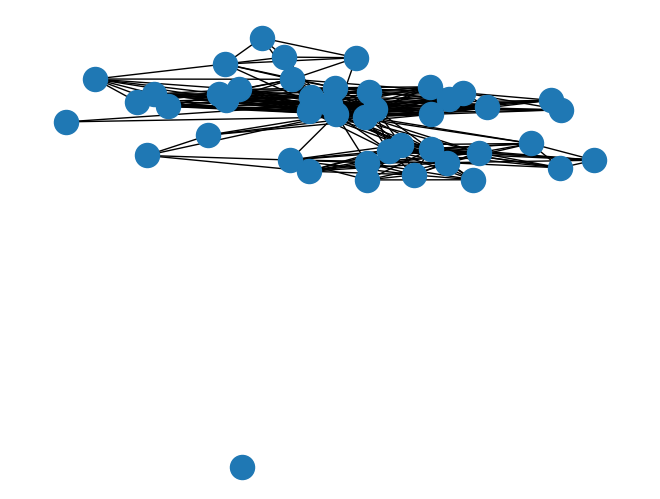

In [14]:
# use pandas to import list of egos with attributes
Egos = pd.read_csv('./MidTerm_Data/Ego.attr.csv', sep=';')
# we focus on Ego n. 46 (the first in the list)
# use pandas to import list of alters of Ego 46, with their attributes
Alters = pd.read_csv('./MidTerm_Data/Alter.attr.46.csv', sep=';')
# use pandas to import edgelist (of Ego 46) as a table
EgoEdges = pd.read_table('./MidTerm_Data/EgoNet.46.csv', sep=';')
EgoEdges = nx.from_pandas_edgelist(EgoEdges, 'V1', 'V2', create_using=nx.Graph()) 

NodeData = Alters.set_index('alter_ID').to_dict('index').items()
EgoEdges.add_nodes_from(NodeData)
nx.draw(EgoEdges)

## 1.

In [15]:
print(f"In 46 alter graph, there is only {len(list(nx.isolates(EgoEdges)))} isolate.")

In 46 alter graph, there is only 1 isolate.


In [16]:
print(f"The isolated friend in the network is : {list(nx.isolates(EgoEdges))}.")

The isolated friend in the network is : [4624].


As there is 1 isolate (id 4624), it mean that 46 has one friend wich does not know any other friend of 46.

In [17]:
EgoEdges_without_isolate = EgoEdges.copy()
EgoEdges_without_isolate.remove_nodes_from(list(nx.isolates(EgoEdges)))
print(f"We got the following triads transitivity : {nx.transitivity(EgoEdges_without_isolate):.2}.")

We got the following triads transitivity : 0.61.


Apart from this only isolate, we got a global transitivy index of 61% which is the upper bound of empirical findings. It means the Ego 46 is part of a very close group of friends that know each other quite well. In addition to that group, he knows one other person.

## 2

In [18]:
Egos[Egos["ego_ID"]==46]

,ego_ID,ego.sex,ego.age,ego.arr,ego.edu,ego.inc,empl,ego.empl.bin,ego.age.cat
7,46,Male,35.0,2002.0,Secondary,1200.0,4,Yes,31-35


In [19]:
Alters["alter.age.cat"].value_counts(normalize=True)*100

41-50    28.888889
36-40    26.666667
31-35    22.222222
51-60    13.333333
60+       4.444444
18-25     2.222222
26-30     2.222222
Name: alter.age.cat, dtype: float64

In [20]:
Alters["alter.age"].describe()

count    45.000000
mean     43.288889
std      13.530474
min      21.000000
25%      34.000000
50%      39.000000
75%      47.000000
max      96.000000
Name: alter.age, dtype: float64

Ego 46 friends are most in the 40s or their 30s with a mean of 45 and a median of 39 years old.
There is not a lot of diversity with 25% quantile being at 34 and 75% quantile at 47 : it seems like ego 46 knows mostly people from a work place. Students (<25) or retired people are not really in his friend list. It is quite logical as Ego 46 himself is 35 years old.

## 3

In [21]:
Alters["alter.rel"].value_counts(normalize=True)*100

Acquaintances    35.555556
Other family     31.111111
Friends          26.666667
Close family      6.666667
Name: alter.rel, dtype: float64

Almost two thirds of Ego 46 friends are considered as friends or acquaintances, so family in a brought sense (other + close) is not the main source of relations. And if we considere close family it is quite small : nuclear family (parents + 2 children, something like that).

## 4

In [22]:
Alters["alter.nat"].value_counts(normalize=True)*100

Sri Lanka    73.333333
Italy        15.555556
Other        11.111111
Name: alter.nat, dtype: float64

In [23]:
def blau(df, col):
    return (1- ((df[col].value_counts() / df[col].count()) ** 2).sum())

# blau index
blau(Alters, 'alter.nat')

0.42567901234567906

In [24]:
# We can now calculate the IQV

blau(Alters, 'alter.nat')*3/2

0.6385185185185186

In [25]:
# Herfindahl-Hirschman index (HHI)
# equal to 1 - Blau

1 - blau(Alters, 'alter.nat')

0.5743209876543209

Sri Lanka origin dominates Ego 46 relationships. Using the different heterogeinety index we can also see that. As the blau index is only 0.5, there is only a half chance that two members randomly selected from a group would be in different categories, which is quite low for 3 categories.

## 5

In [26]:
# density
nx.density(EgoEdges) 

0.2696969696969697

In [27]:
# Transitivity
print(nx.transitivity(EgoEdges)) 

0.6147730187227495


In [28]:
# Diameter
nx.diameter(EgoEdges_without_isolate)

4

In [29]:
nx.average_shortest_path_length(EgoEdges_without_isolate)

1.9323467230443974

Apart from the isolate friend, most of the other friends know each other : high transitivy. The average shortest path speaks for itself : it is between 1 and 2, meaning that a lot of friends know each other and the rest are distant from only 1 friend.

Ego 46 friend seems cohesive a part from one friend.